# Sprint 13: Pronósticos y predicciones

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos. Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. El objetivo de este proyecto consiste en analizarlos y elaborar una estrategia de retención de clientes.

## Descargar los datos

### Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Leer los datos

In [2]:
df = pd.read_csv('gym_churn_us.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Análisis exploratorio de datos

### Observa el dataset: ¿contiene alguna característica ausente?
Estudia los valores promedio y la desviación estándar (utiliza el método describe()).


#### Datos ausentes

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

No hay datos ausentes 

#### Datos duplicados

In [5]:
df.duplicated().sum()

0

No hay filas exactamente iguales

#### Descripción de los datos

In [6]:
#Aplicamos describe y seleccionamos unicamente las estadisticas que nos interesan
df.describe().loc[['count', 'mean', 'std']]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521


### Observa los valores medios de las características en dos grupos: 
Para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).


In [7]:
#Agrupamos
df_churn = df.groupby('Churn')

#Aplicamos el metodo describe y seleccionamos las estadísticas de interés
describe_filt = df_churn.describe().loc[:, (slice(None), ['count', 'mean', 'std'])]

#Transportamos
describe_transposed = describe_filt.T

describe_transposed

Churn                                              0            1
gender                            count  2939.000000  1061.000000
                                  mean      0.510037     0.510839
                                  std       0.499984     0.500118
Near_Location                     count  2939.000000  1061.000000
                                  mean      0.873086     0.768143
                                  std       0.332933     0.422217
Partner                           count  2939.000000  1061.000000
                                  mean      0.534195     0.355325
                                  std       0.498914     0.478837
Promo_friends                     count  2939.000000  1061.000000
                                  mean      0.353522     0.183789
                                  std       0.478144     0.387495
Phone                             count  2939.000000  1061.000000
                                  mean      0.903709     0.902922
                                  std       0.295040     0.296204
Contract_period                   count  2939.000000  1061.000000
                                  mean      5.747193     1.728558
                                  std       4.716942     2.132371
Group_visits                      count  2939.000000  1061.000000
                                  mean      0.464103     0.268615
                                  std       0.498795     0.443448
Age                               count  2939.000000  1061.000000
                                  mean     29.976523    26.989632
                                  std       3.009933     2.895163
Avg_additional_charges_total      count  2939.000000  1061.000000
                                  mean    158.445715   115.082899
                                  std      99.801599    77.696419
Month_to_end_contract             count  2939.000000  1061.000000
                                  mean      5.283089     1.662582
                                  std       4.363522     1.964593
Lifetime                          count  2939.000000  1061.000000
                                  mean      4.711807     0.990575
                                  std       3.874780     1.110799
Avg_class_frequency_total         count  2939.000000  1061.000000
                                  mean      2.024876     1.474995
                                  std       1.016006     0.694705
Avg_class_frequency_current_month count  2939.000000  1061.000000
                                  mean      2.027882     1.044546
                                  std       1.018994     0.770237

### Traza histogramas de barras y distribuciones de características 
Para aquellas personas que se fueron (cancelación) y para las que se quedaron.


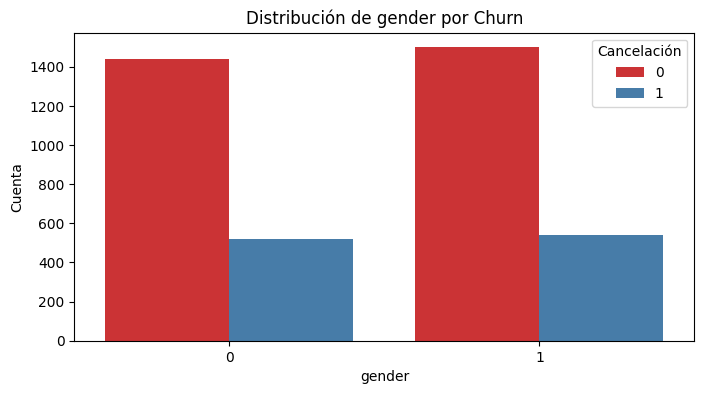

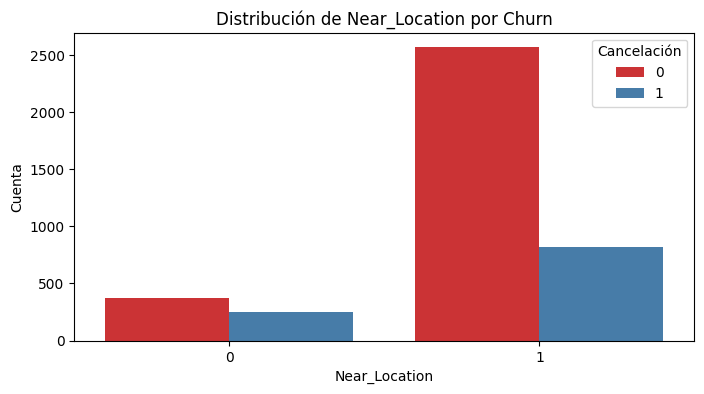

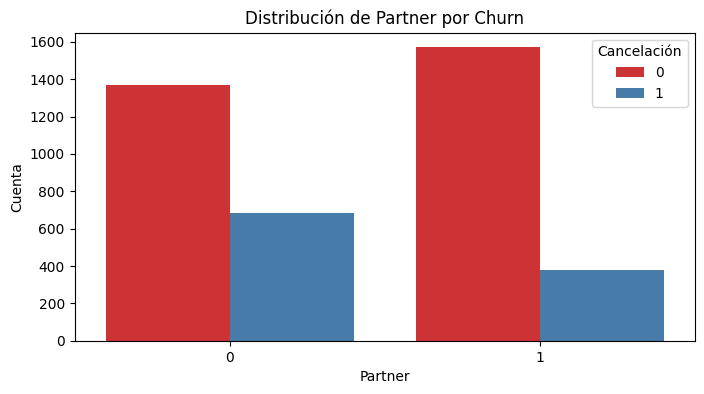

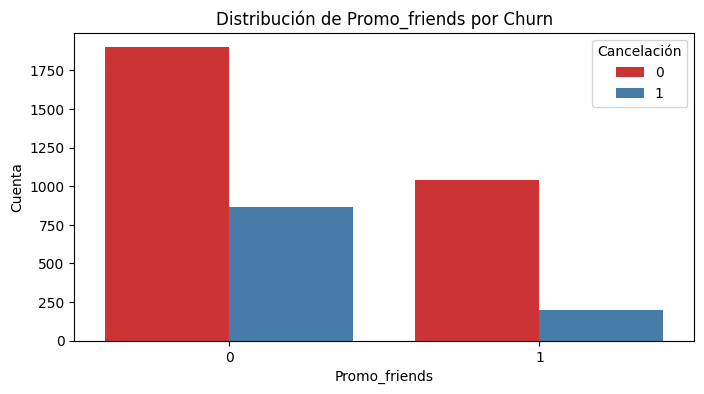

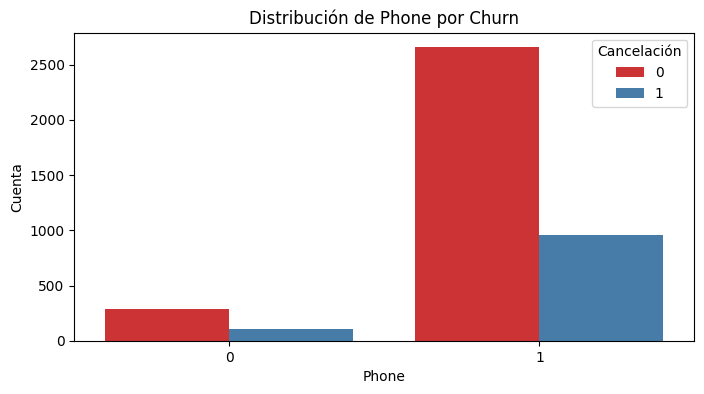

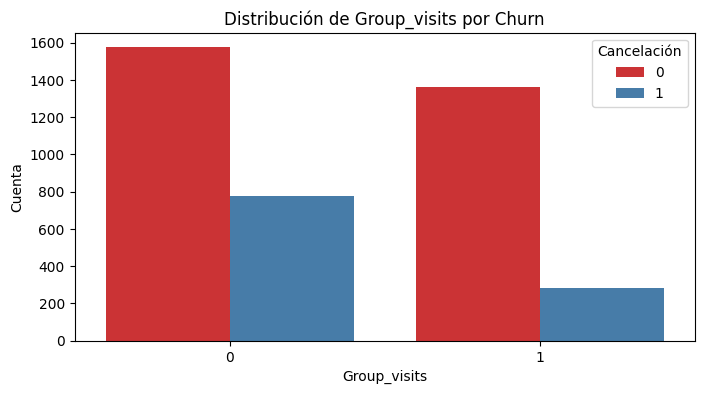

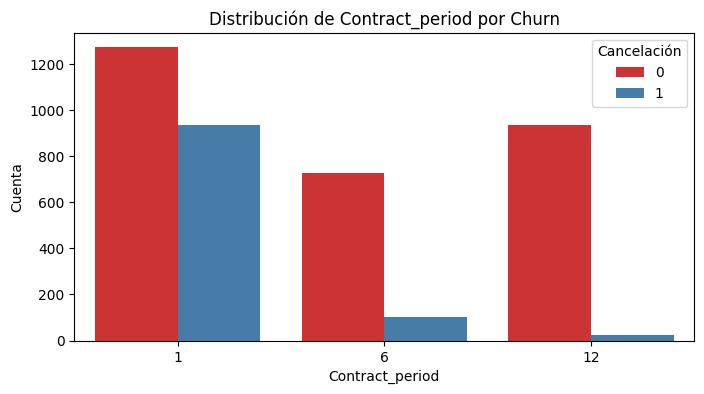

In [8]:
#lista de columnas
categorical_columns = [
    'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 
    'Group_visits', 'Contract_period'
]

#función para graficar las características
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    
    #histograma de barras para la variable categórica
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    
    #título y etiquetas
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(f'{col}')
    plt.ylabel('Cuenta')
    plt.legend(title='Cancelación', loc='upper right')
    
    # Mostrar la gráfica
    plt.show()



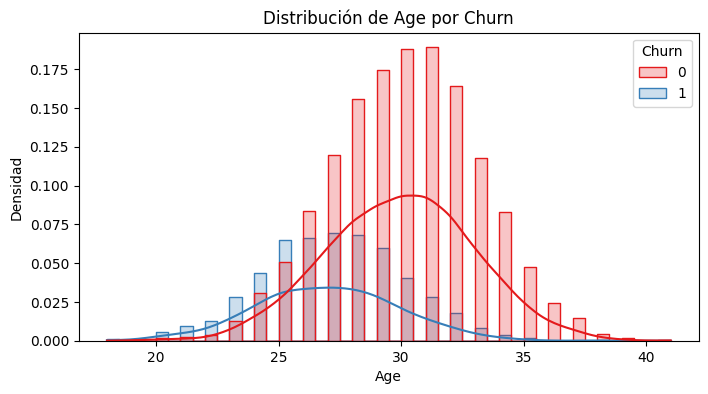

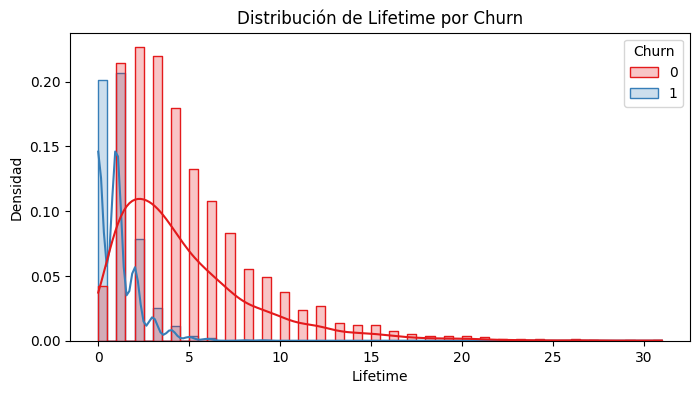

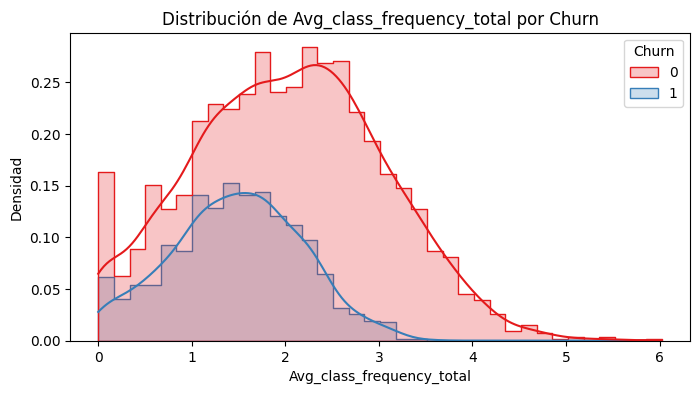

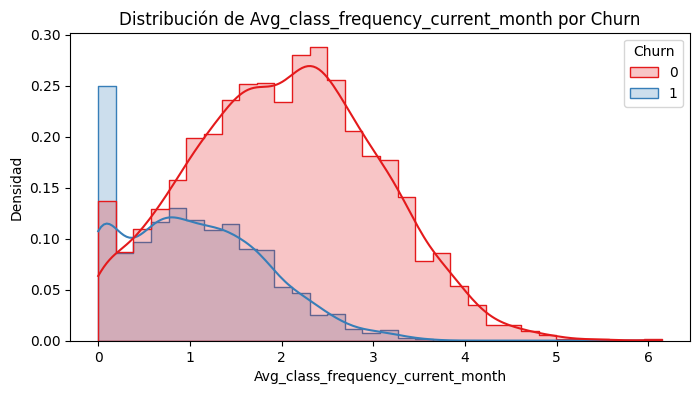

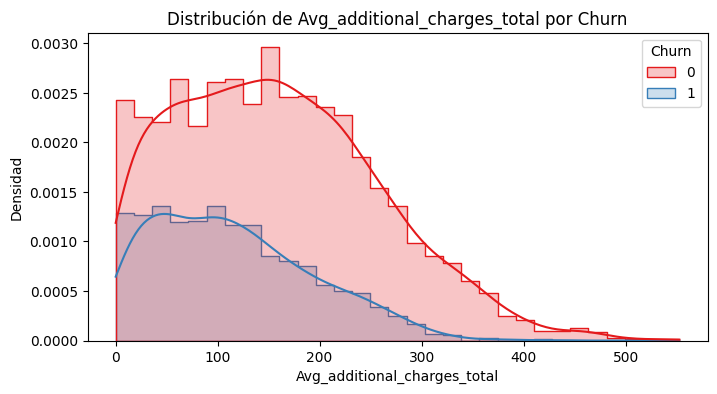

In [9]:
#Lista de columnas
continuous_columns = [
    'Age', 'Lifetime', 'Avg_class_frequency_total', 
    'Avg_class_frequency_current_month', 'Avg_additional_charges_total'
]

#Categorias continuas
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    
    sns.histplot(data=df, x=col, hue='Churn', element='step', kde=True, palette='Set1', stat="density")
    
    # Obtener los handles y labels 
    handles, labels = plt.gca().get_legend_handles_labels()
   
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(f'{col}')
    plt.ylabel('Densidad')
    
    # Mostrar la gráfica
    plt.show()

### Crea una matriz de correlación y muéstrala.

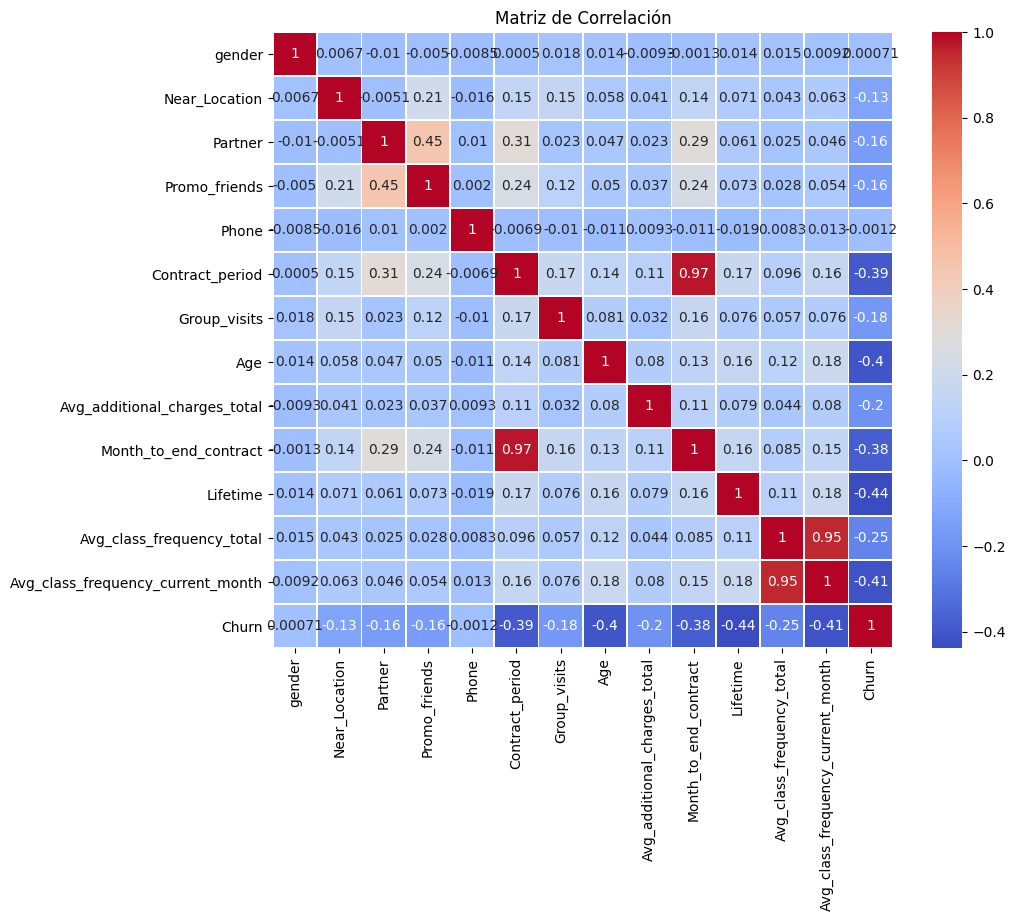

In [10]:
# Crear la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

## Construir un modelo para predecir la cancelación de usuarios
Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().


In [11]:
# Dividir las características (X) y la variable objetivo (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Entrena el modelo en el set de entrenamiento con dos métodos:
1. regresión logística;
2. bosque aleatorio.


Estándarizaremos los datos de validación para el modelo de regresión lógica

In [12]:
#crear una instancia de StandardScaler
scaler = StandardScaler()
#ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
#solo transformar los datos de validación
X_val_scaled = scaler.transform(X_val)

#entrenar modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

#predicciones en el conjunto de validación
y_pred_logistic = logistic_model.predict(X_val_scaled)

#entrenar modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#predicciones en el conjunto de validación
y_pred_rf = rf_model.predict(X_val)

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?


In [13]:
#evaluación de los modelos
#creamos una función para evaluar
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f'Resultadoss para {model_name}:')
    print(f'Exactitud: {accuracy:.4f}')
    print(f'Precisión: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1: {f1:.4f}')
    print('---------------------------')

# Evaluar Regresión Logística
evaluate_model(y_val, y_pred_logistic, "Logistic Regression")

# Evaluar Bosque Aleatorio
evaluate_model(y_val, y_pred_rf, "Random Forest")

Resultadoss para Logistic Regression:
Exactitud: 0.9163
Precisión: 0.8729
Recall: 0.7822
F1: 0.8251
---------------------------
Resultadoss para Random Forest:
Exactitud: 0.9100
Precisión: 0.8495
Recall: 0.7822
F1: 0.8144
---------------------------


## Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

### Estandariza los datos.

In [14]:
data = df.drop(columns=['Churn'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. 
Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

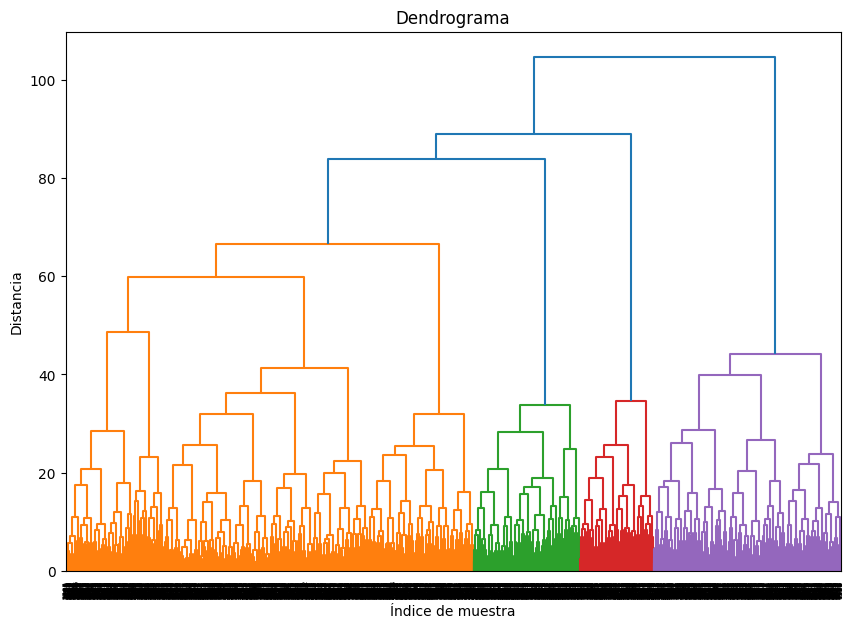

In [15]:
plt.figure(figsize=(10, 7))
linked = linkage(data_scaled, method='ward') 
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. 
(Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [16]:
#Entrenar el modelo K-means con 5 clústeres
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)


### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [17]:
cluster_means = df.groupby('Cluster').mean()
print("Valores medios de características por clúster:")
cluster_means

Valores medios de características por clúster:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


Muchas características tienen medias similares, tal como género, locación y edad. Partner tiene variaciones, siendo el cluster 0 el mayor y el 1 el menor, promo friends el el cluster 2 el mayor y 3 el menor. Los contratos más grandes son del cluster 2 mientras que el 3 tiene los contratos más cortos. No parece haber mucha diferencia entre group visits. A simple vista la tasa de cancelación es mayor en el cluster 3 relacionado a los contratos más cortos y el menor gasto en el gimnasio.

### Traza distribuciones de características para los clústeres. ¿Notas algo?

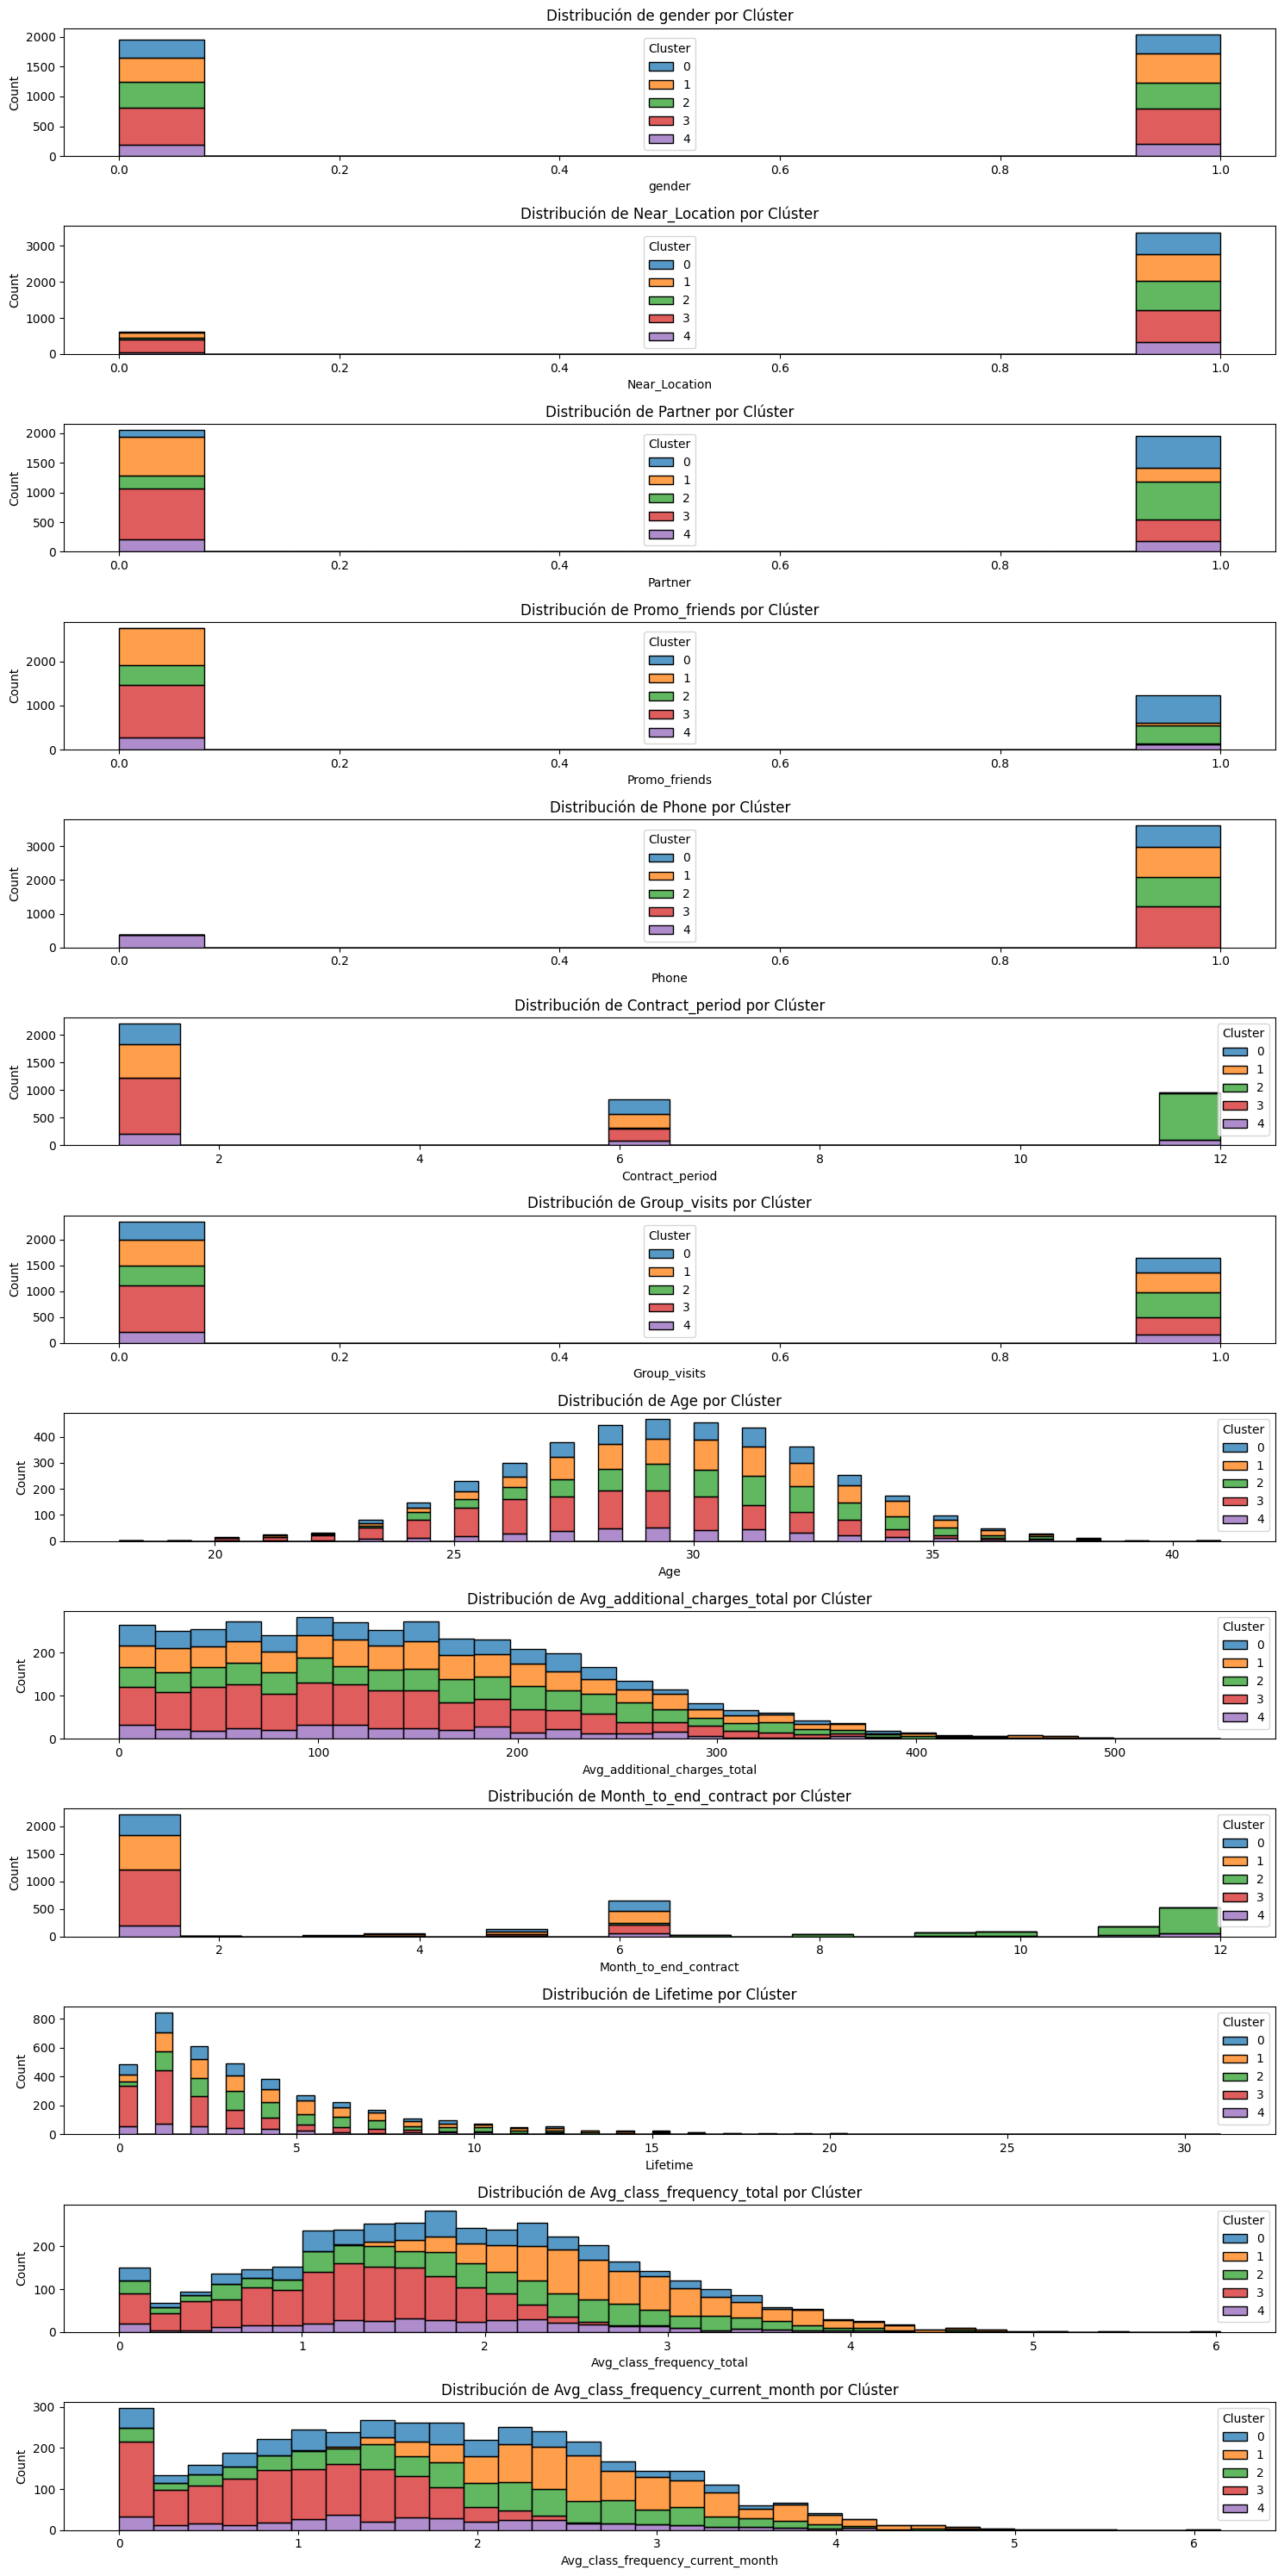

In [18]:
features = data.columns  

plt.figure(figsize=(15, 30))  
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.histplot(data=df, x=feature, hue='Cluster', multiple='stack', palette='tab10')
    plt.title(f'Distribución de {feature} por Clúster')

# Ajustar el espaciado entre subgráficos
plt.subplots_adjust(hspace=0.5)  

plt.tight_layout()
plt.show()

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). 
¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [19]:
churn_rates = df.groupby('Cluster')['Churn'].mean()
print("Tasa de cancelación por clúster:")
churn_rates

Tasa de cancelación por clúster:


Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

El cluster 3 es el de mayor tasa de cancelación, por lo que se ve ligado fuertemente al periodo de contrato (los más cortos). El cluster 2 es el que tiene contratos más largos y es el que presenta mayor fidelidad.

## Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

El cluster 2 es el más leal, cancelaciones más bajas, contratos largos y mayor actividad a la semana. El cluster 3 son los clientes con mayor propensión a cancelar, menos visitas al gimnacio, contratos cortos y pocos cargos adicionales.

Aparentemente las caracteristicas que influyen más en la tasa de cancelación son el periodo de contrato (al finalizar el contrato, cancelan el servicio) y los gastos hechos en el gimnasio (aditional charges). La recomendación sería dar enfasis en contratos más largos mediante descuentos y monitorear igualmente los cargos adicionales, si el cliente compra los servicios o productos que se ofrecen en el gimnasio es que sigue siendo un cliente activo a diferencia de si solamente tiene un contrato largo y está totalmente incativo puede considerarse un cliente ausente.